# Error Analysis 

TODO

In [1]:
import sys
import os

sys.path.insert(0, "/mnt/data/users/lily/triage/src")
sys.path.append("/home/liliana/.pyenv/versions/triage/lib/python3.10/site-packages")

sys.path

['/mnt/data/users/lily/triage/src',
 '/mnt/data/users/lily/triage/src/triage/component/postmodeling/error_analysis',
 '/home/liliana/.pyenv/versions/3.10.4/lib/python310.zip',
 '/home/liliana/.pyenv/versions/3.10.4/lib/python3.10',
 '/home/liliana/.pyenv/versions/3.10.4/lib/python3.10/lib-dynload',
 '',
 '/home/liliana/.pyenv/versions/dojo_mh/lib/python3.10/site-packages',
 '/mnt/data/users/lily/dojo_mh/src',
 '/home/liliana/.pyenv/versions/triage/lib/python3.10/site-packages']

In [2]:
import yaml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from triage.component.postmodeling.error_analysis import (
    generate_error_analysis,
    output_all_analysis,
    output_specific_error_analysis,
    output_specific_configuration
)

### Load Database 

Your database configuration file should have the following struture: 

~~~
host: yourhost
user: youruser
db: databasename
pass: yourpassword
port: portofdb
~~~

In [3]:
# Configure Database
with open('database.yaml') as file:
    dbconfig = yaml.full_load(file)

host= dbconfig['host']
user= dbconfig['user']
database= dbconfig['db']
password= dbconfig['pass']
port= dbconfig['port']

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user, password, host, port, database))

db_conn = engine.connect()

The `model_id` must have predictions already persisted in the DB. 

In [4]:
model_id = 1630

In [5]:
error_analysis_results = generate_error_analysis(model_id, db_conn)

2023-02-16 22:17:09 -    INFO Found credentials in shared credentials file: ~/.aws/credentials




    Error analysis type: Negative (FN), size of the list: 100

    Decision Tree with max_depth of, 1

    Top 10 features associated with error in label type Negative (FN)
    


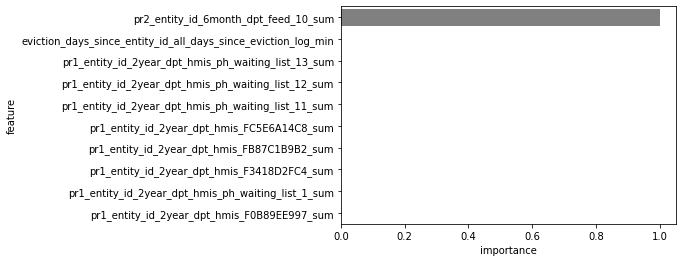

|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- class: 0
|--- pr2_entity_id_6month_dpt_feed_10_sum >  0.50
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 100

    Decision Tree with max_depth of, 3

    Top 10 features associated with error in label type Negative (FN)
    


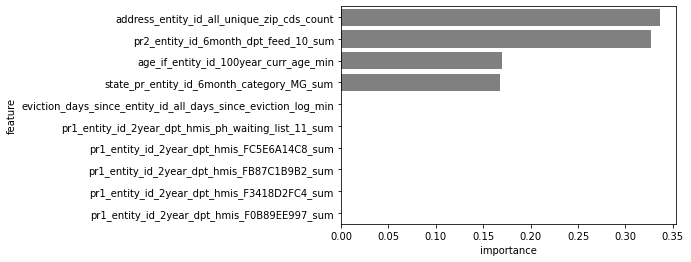

|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |--- class: 0
|   |   |--- state_pr_entity_id_6month_category_MG_sum >  5.50
|   |   |   |--- class: 1
|--- pr2_entity_id_6month_dpt_feed_10_sum >  0.50
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 100

    Decision Tree with max_depth of, 5

    Top 10 features associated with error in label type Negative (FN)
    


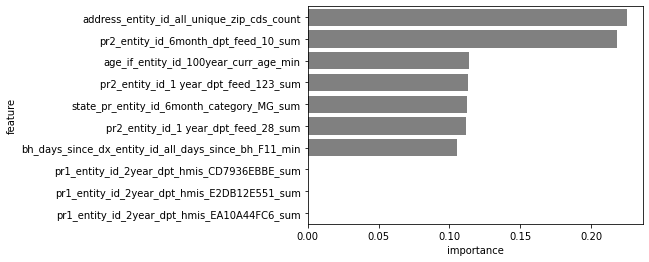

|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum >  5.50
|   |   |   |   |--- class: 1
|   |   |--- pr2_entity_id_1 year_dp

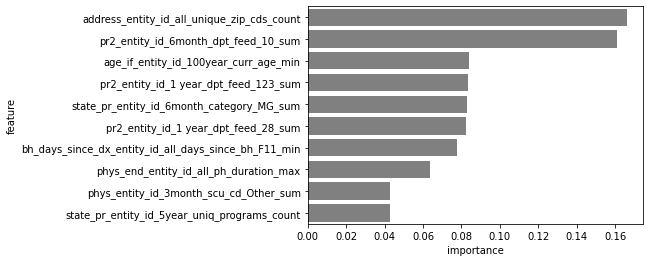

|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  0.50
|   |   

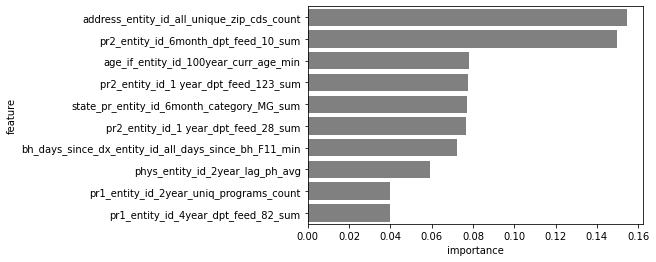

|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  0.50
|   |   

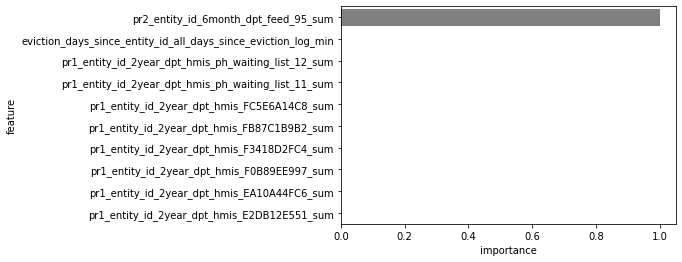

|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- class: 0
|--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 200

    Decision Tree with max_depth of, 3

    Top 10 features associated with error in label type Negative (FN)
    


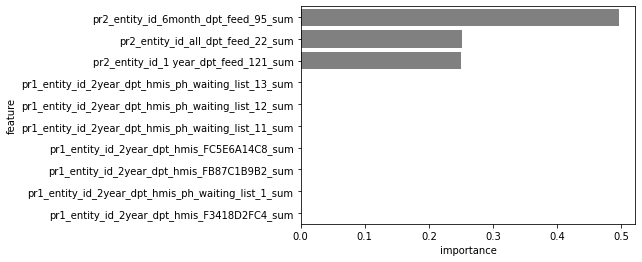

|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- class: 0
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum >  2.50
|   |   |   |--- class: 1
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum >  0.50
|   |   |--- class: 1
|--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 200

    Decision Tree with max_depth of, 5

    Top 10 features associated with error in label type Negative (FN)
    


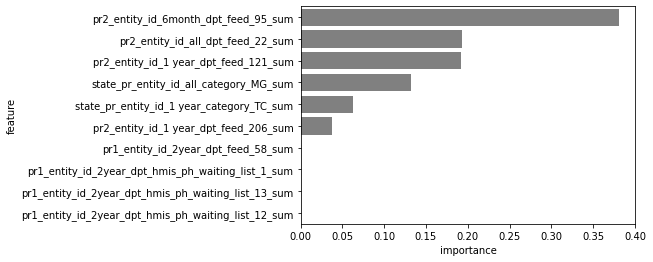

|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum >  0.50
|   |   |   |   |--- state_pr_entity_id_all_category_MG_sum <= 16.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- state_pr_entity_id_all_category_MG_sum >  16.00
|   |   |   |   |   |--- class: 1
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum >  2.50
|   |   |   |--- class: 1
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum >  0.50
|   |   |--- class: 1
|--- pr2_entity_id_6month_dpt_feed_95_sum >  0.50
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN

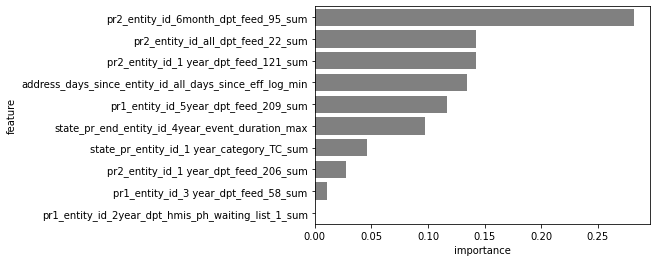

|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min <= 1.41
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min >  1.41
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--- pr1_entity_id_5year_dpt_feed_209_sum <= 2.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- pr1_entity_id_5year_dpt_feed_209_sum >  2.00
|   |   |   |

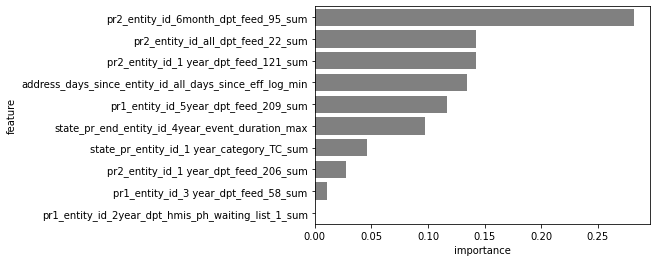

|--- pr2_entity_id_6month_dpt_feed_95_sum <= 0.50
|   |--- pr2_entity_id_1 year_dpt_feed_121_sum <= 0.50
|   |   |--- pr2_entity_id_all_dpt_feed_22_sum <= 2.50
|   |   |   |--- state_pr_entity_id_1 year_category_TC_sum <= 0.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum <= 0.50
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min <= 1.41
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- address_days_since_entity_id_all_days_since_eff_log_min >  1.41
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_206_sum >  0.50
|   |   |   |   |   |--- pr1_entity_id_5year_dpt_feed_209_sum <= 2.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- pr1_entity_id_5year_dpt_feed_209_sum >  2.00
|   |   |   |

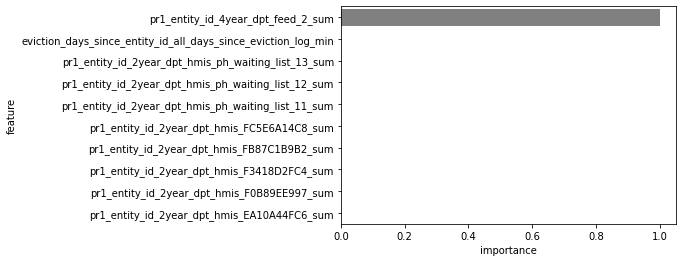

|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- class: 0
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 300

    Decision Tree with max_depth of, 3

    Top 10 features associated with error in label type Negative (FN)
    


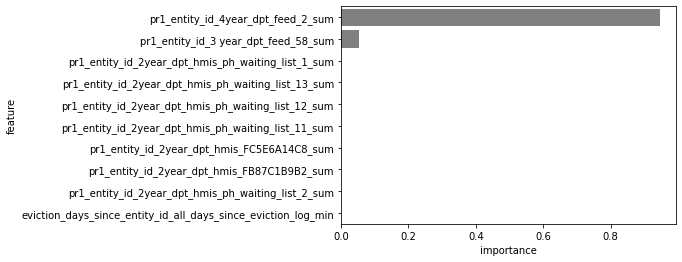

|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 300

    Decision Tree with max_depth of, 5

    Top 10 features associated with error in label type Negative (FN)
    


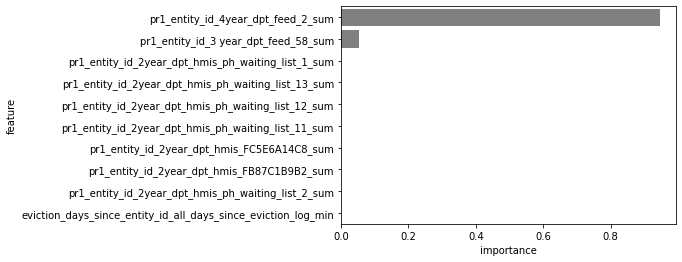

|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 300

    Decision Tree with max_depth of, 10

    Top 10 features associated with error in label type Negative (FN)
    


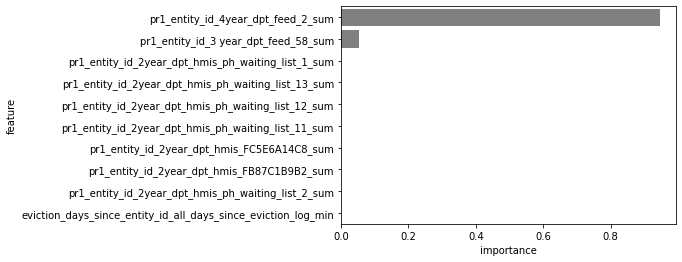

|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- class: 1

             ######            


    Error analysis type: Negative (FN), size of the list: 300

    Decision Tree with max_depth of, None

    Top 10 features associated with error in label type Negative (FN)
    


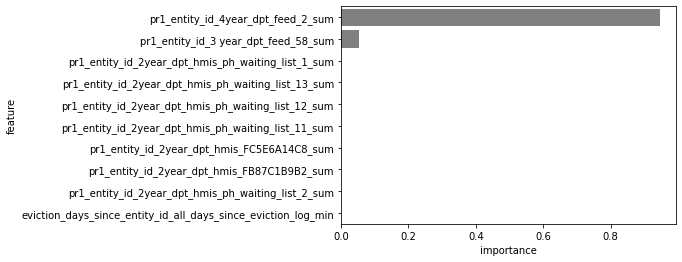

|--- pr1_entity_id_4year_dpt_feed_2_sum <= 4.00
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 1.50
|   |   |--- class: 0
|   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  1.50
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum <= 0.50
|   |   |   |--- class: 0
|   |   |--- pr1_entity_id_4year_dpt_feed_2_sum >  0.50
|   |   |   |--- class: 1
|--- pr1_entity_id_4year_dpt_feed_2_sum >  4.00
|   |--- class: 1

             ######            
*******************************************


In [6]:
output_specific_error_analysis(error_analysis_results, error_type='error_negative_label')



    Error analysis type: Negative (FN), size of the list: 100

    Decision Tree with max_depth of, 10

    Top 10 features associated with error in label type Negative (FN)
    


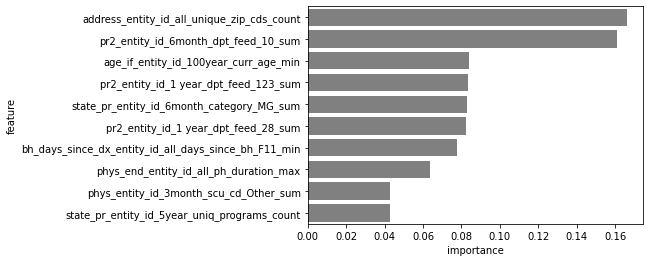

|--- pr2_entity_id_6month_dpt_feed_10_sum <= 0.50
|   |--- age_if_entity_id_100year_curr_age_min <= -54.50
|   |   |--- address_entity_id_all_unique_zip_cds_count <= 3.50
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min <= 5878.00
|   |   |   |   |--- class: 1
|   |   |   |--- bh_days_since_dx_entity_id_all_days_since_bh_F11_min >  5878.00
|   |   |   |   |--- class: 0
|   |   |--- address_entity_id_all_unique_zip_cds_count >  3.50
|   |   |   |--- class: 1
|   |--- age_if_entity_id_100year_curr_age_min >  -54.50
|   |   |--- pr2_entity_id_1 year_dpt_feed_28_sum <= 0.50
|   |   |   |--- state_pr_entity_id_6month_category_MG_sum <= 5.50
|   |   |   |   |--- pr2_entity_id_1 year_dpt_feed_123_sum <= 0.50
|   |   |   |   |   |--- phys_entity_id_1 year_scu_cd_ER_sum <= 49.00
|   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- pr1_entity_id_3 year_dpt_feed_58_sum >  0.50
|   |   

In [8]:
output_specific_configuration(error_analysis_results, error_type="error_negative_label", 
                             k=100, max_depth=10)